In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

# Load Data

In [9]:
df = pd.read_csv('/content/drive/MyDrive/Belajar Pandas/spam_ham_dataset.csv')
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


# Memahami Data

In [10]:
print("Total Rows : ", df.shape[0])
print("Total Cols : ", df.shape[1])

Total Rows :  5171
Total Cols :  4


In [11]:
len(df['Unnamed: 0'].unique())

5171

- Jika dilihat dari panjangnya unique value dari Unnamed: 0 sepertinya kolom tersebut adalah Id dari email terkait
- Kita dapat menghapus kolom tersebut

In [12]:
df_backup = df.copy(deep=True)

In [13]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [14]:
df.head()

,label,text,label_num
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0


label dan label_num merupakan feature yang sama hanya saja label_num merupakan hasil encoding dari label

Apakah maksud dari spam ? Apakah maksud dari ham ?

1. `Spam`
    Email spam adalah email yang tidak diinginkan oleh penerima. Email ini bisa merupakan email pemasaran, atau malware, atau phishing
2. `Ham`
    Pengertian ham sendiri adalah bukan spam. Memang terasa aneh, tetapi memang itulah pengertian yang didefinisikan di https://wiki.apache.org/spamassassin/Ham .


In [15]:
print("Total missing values : ",df.isnull().sum().sum())

Total missing values :  0


# Visualisasi Data

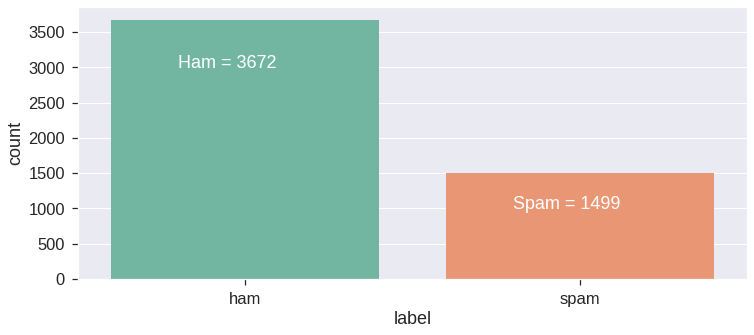

In [16]:
plt.figure(figsize=(12,5))
sns.set_context('notebook', font_scale=1.5)
sns.countplot(x='label', data=df, palette='Set2')
plt.annotate('Ham = '+str(df['label'][df['label']=='ham'].count()), xy=(-0.2, 3000), xytext=(-0.2, 3000), size=18, color='w')
plt.annotate('Spam = '+str(df['label'][df['label']=='spam'].count()), xy=(0.8, 1000), xytext=(0.8, 1000), size=18, color='w');
plt.show()

In [17]:
# For Text processing 
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
df['text'].head()

0    Subject: enron methanol ; meter # : 988291\r\n...
1    Subject: hpl nom for january 9 , 2001\r\n( see...
2    Subject: neon retreat\r\nho ho ho , we ' re ar...
3    Subject: photoshop , windows , office . cheap ...
4    Subject: re : indian springs\r\nthis deal is t...
Name: text, dtype: object

# Cleaning Text

In [19]:
stop_words = set(stopwords.words('english')) 

df['text'] = df['text'].apply(lambda x: ' '.join([ word for word in word_tokenize(x)  if not word in stop_words]))

In [20]:
X = df.loc[:, 'text']
y =df.loc[:, 'label_num'].values

In [21]:
X[0]

"Subject : enron methanol ; meter # : 988291 follow note gave monday , 4 / 3 / 00 { preliminary flow data provided daren } . please override pop ' daily volume { presently zero } reflect daily activity obtain gas control . change needed asap economics purposes ."

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(X)

In [26]:
X = X.toarray()

In [27]:
X[0]

array([1, 0, 0, ..., 0, 0, 0])

In [28]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [29]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [30]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)


In [31]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm1 = confusion_matrix(y_test, y_pred)

In [32]:
print('Accuracy: ', accuracy_score(y_test, y_pred) * 100)


Accuracy:  95.8118556701031


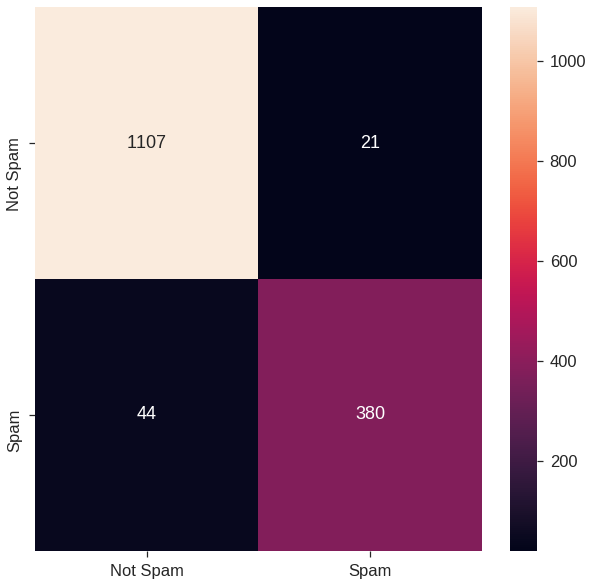

In [33]:
import seaborn as sns
plt.figure(figsize = (10, 10))
sns.heatmap(cm1,annot = True, fmt="n", xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])

In [34]:
from sklearn.ensemble import RandomForestClassifier
cl=RandomForestClassifier()
cl.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [35]:
# Predicting the Test set results
y_pred = cl.predict(X_test)

In [36]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm2 = confusion_matrix(y_test, y_pred)
print('Accuracy: ', accuracy_score(y_test, y_pred) * 100)

Accuracy:  97.68041237113401
